In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../../')
import utils

In [2]:
CALIBRATION_FILE = '../../../../calibration/out/C.mat'
DATA_FILE = '../../../../experiment_data/blue_feet/10/important_experiments/2016.10.07_00.21.03_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/7  0:21:3
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



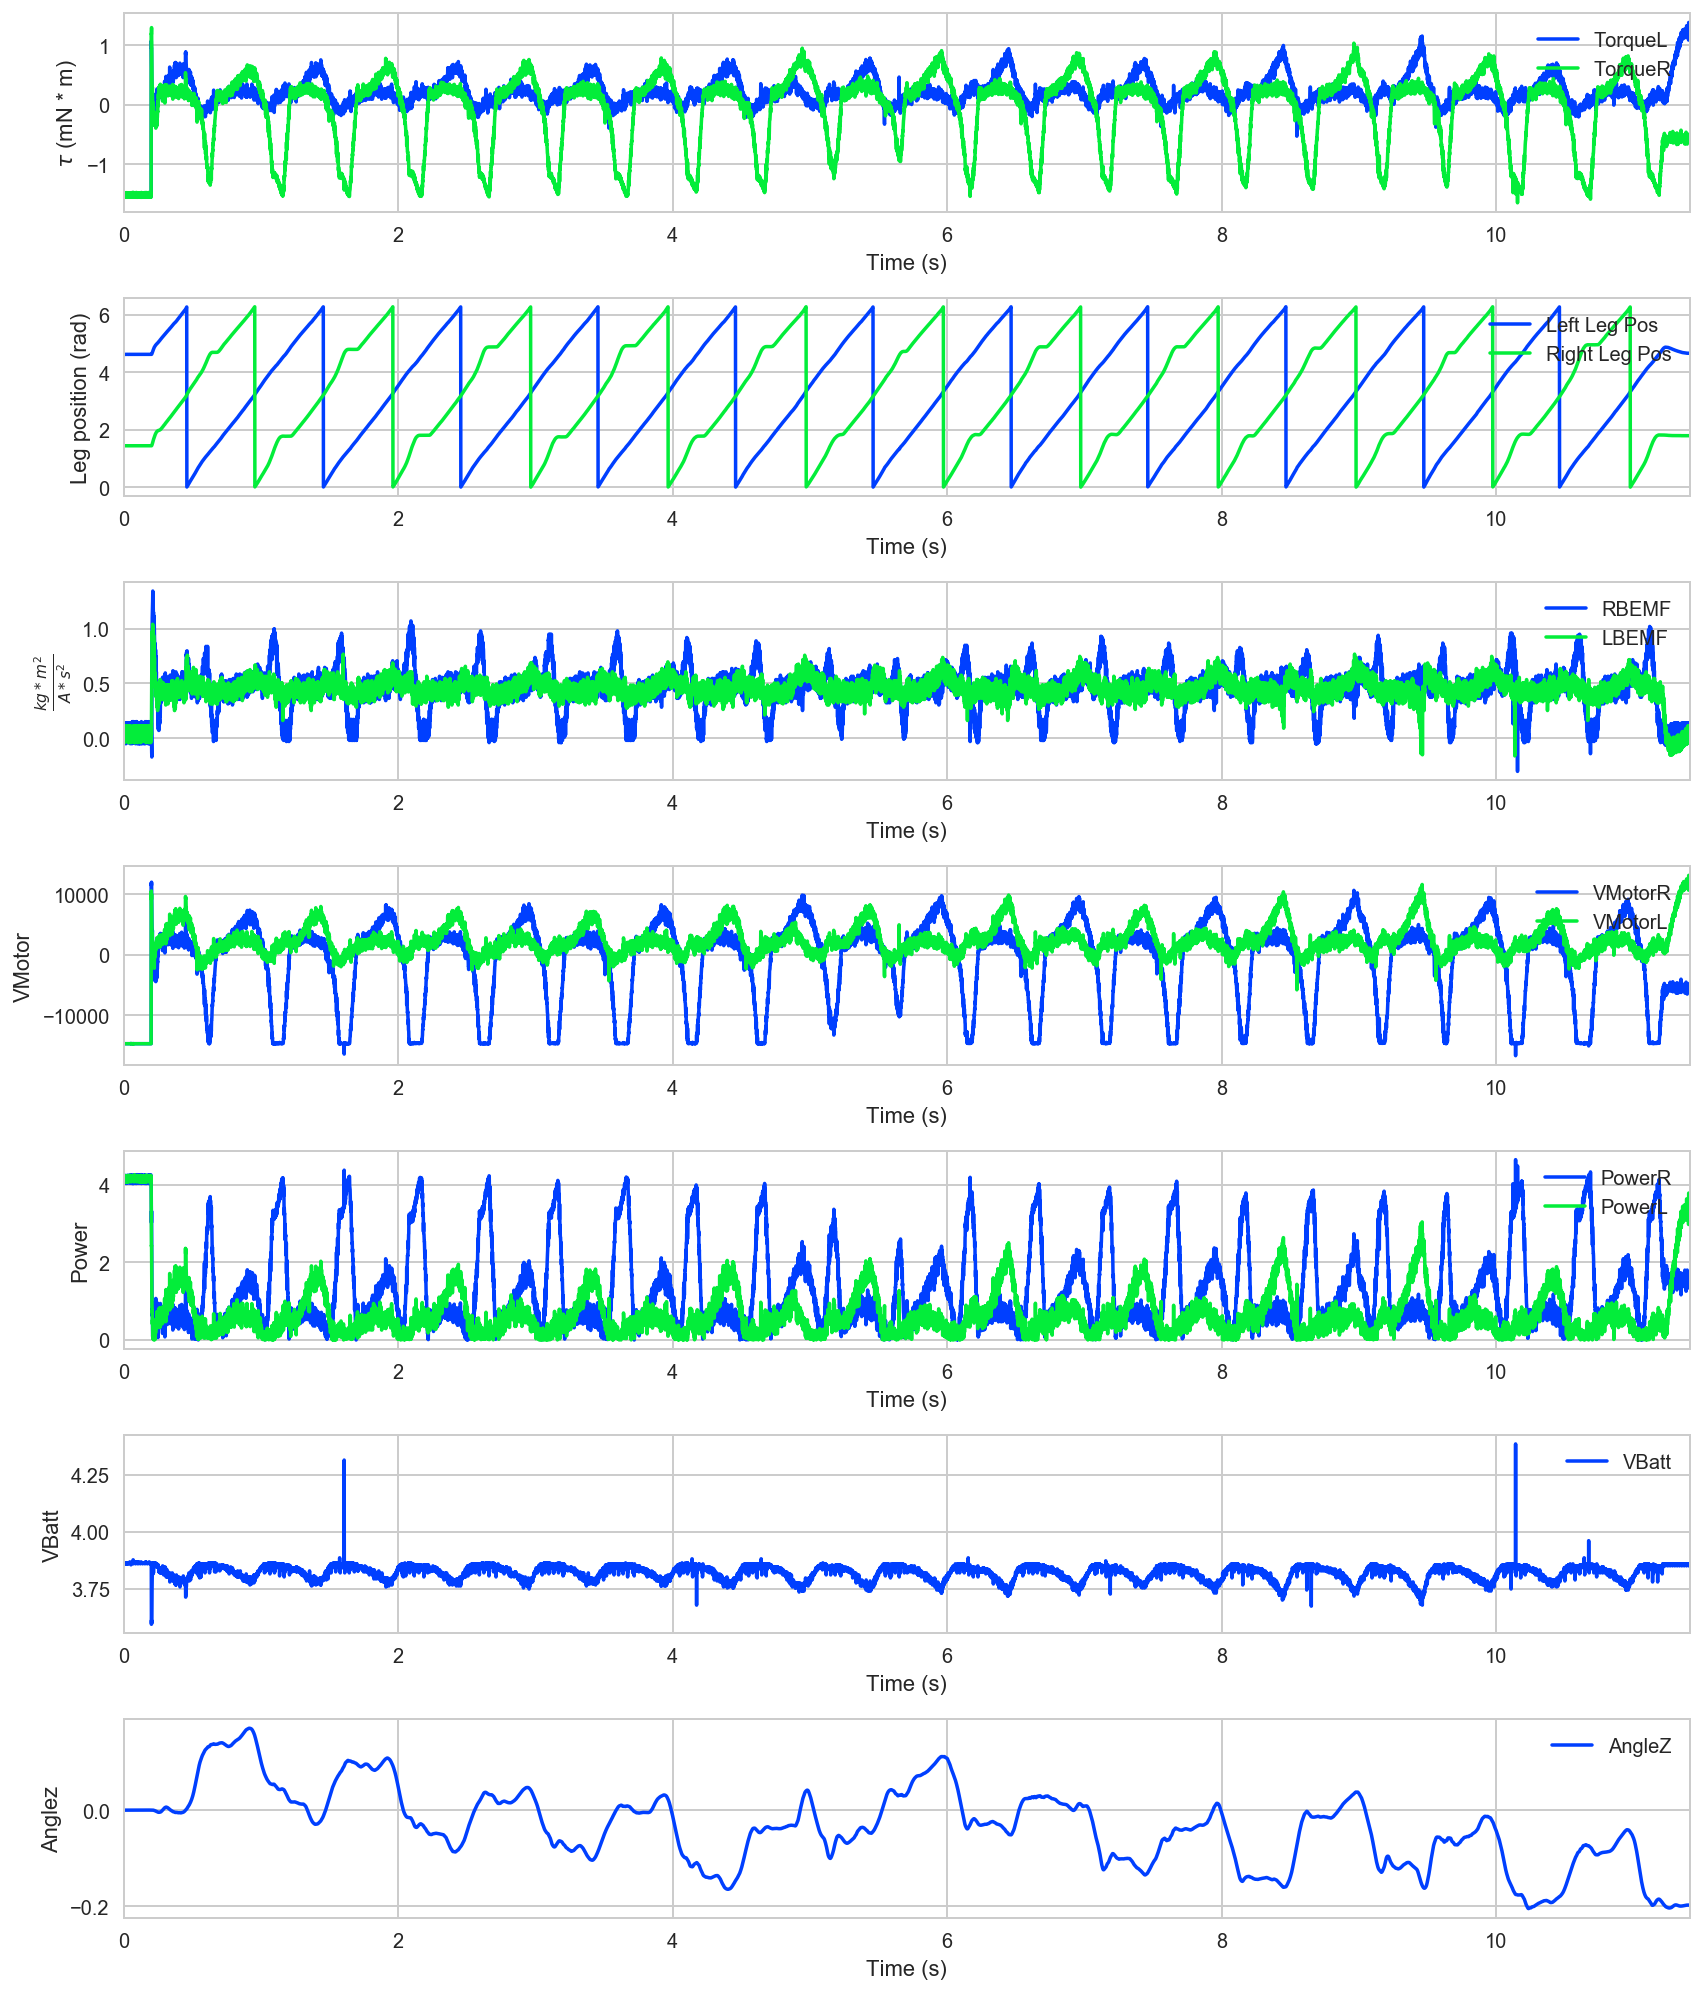

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

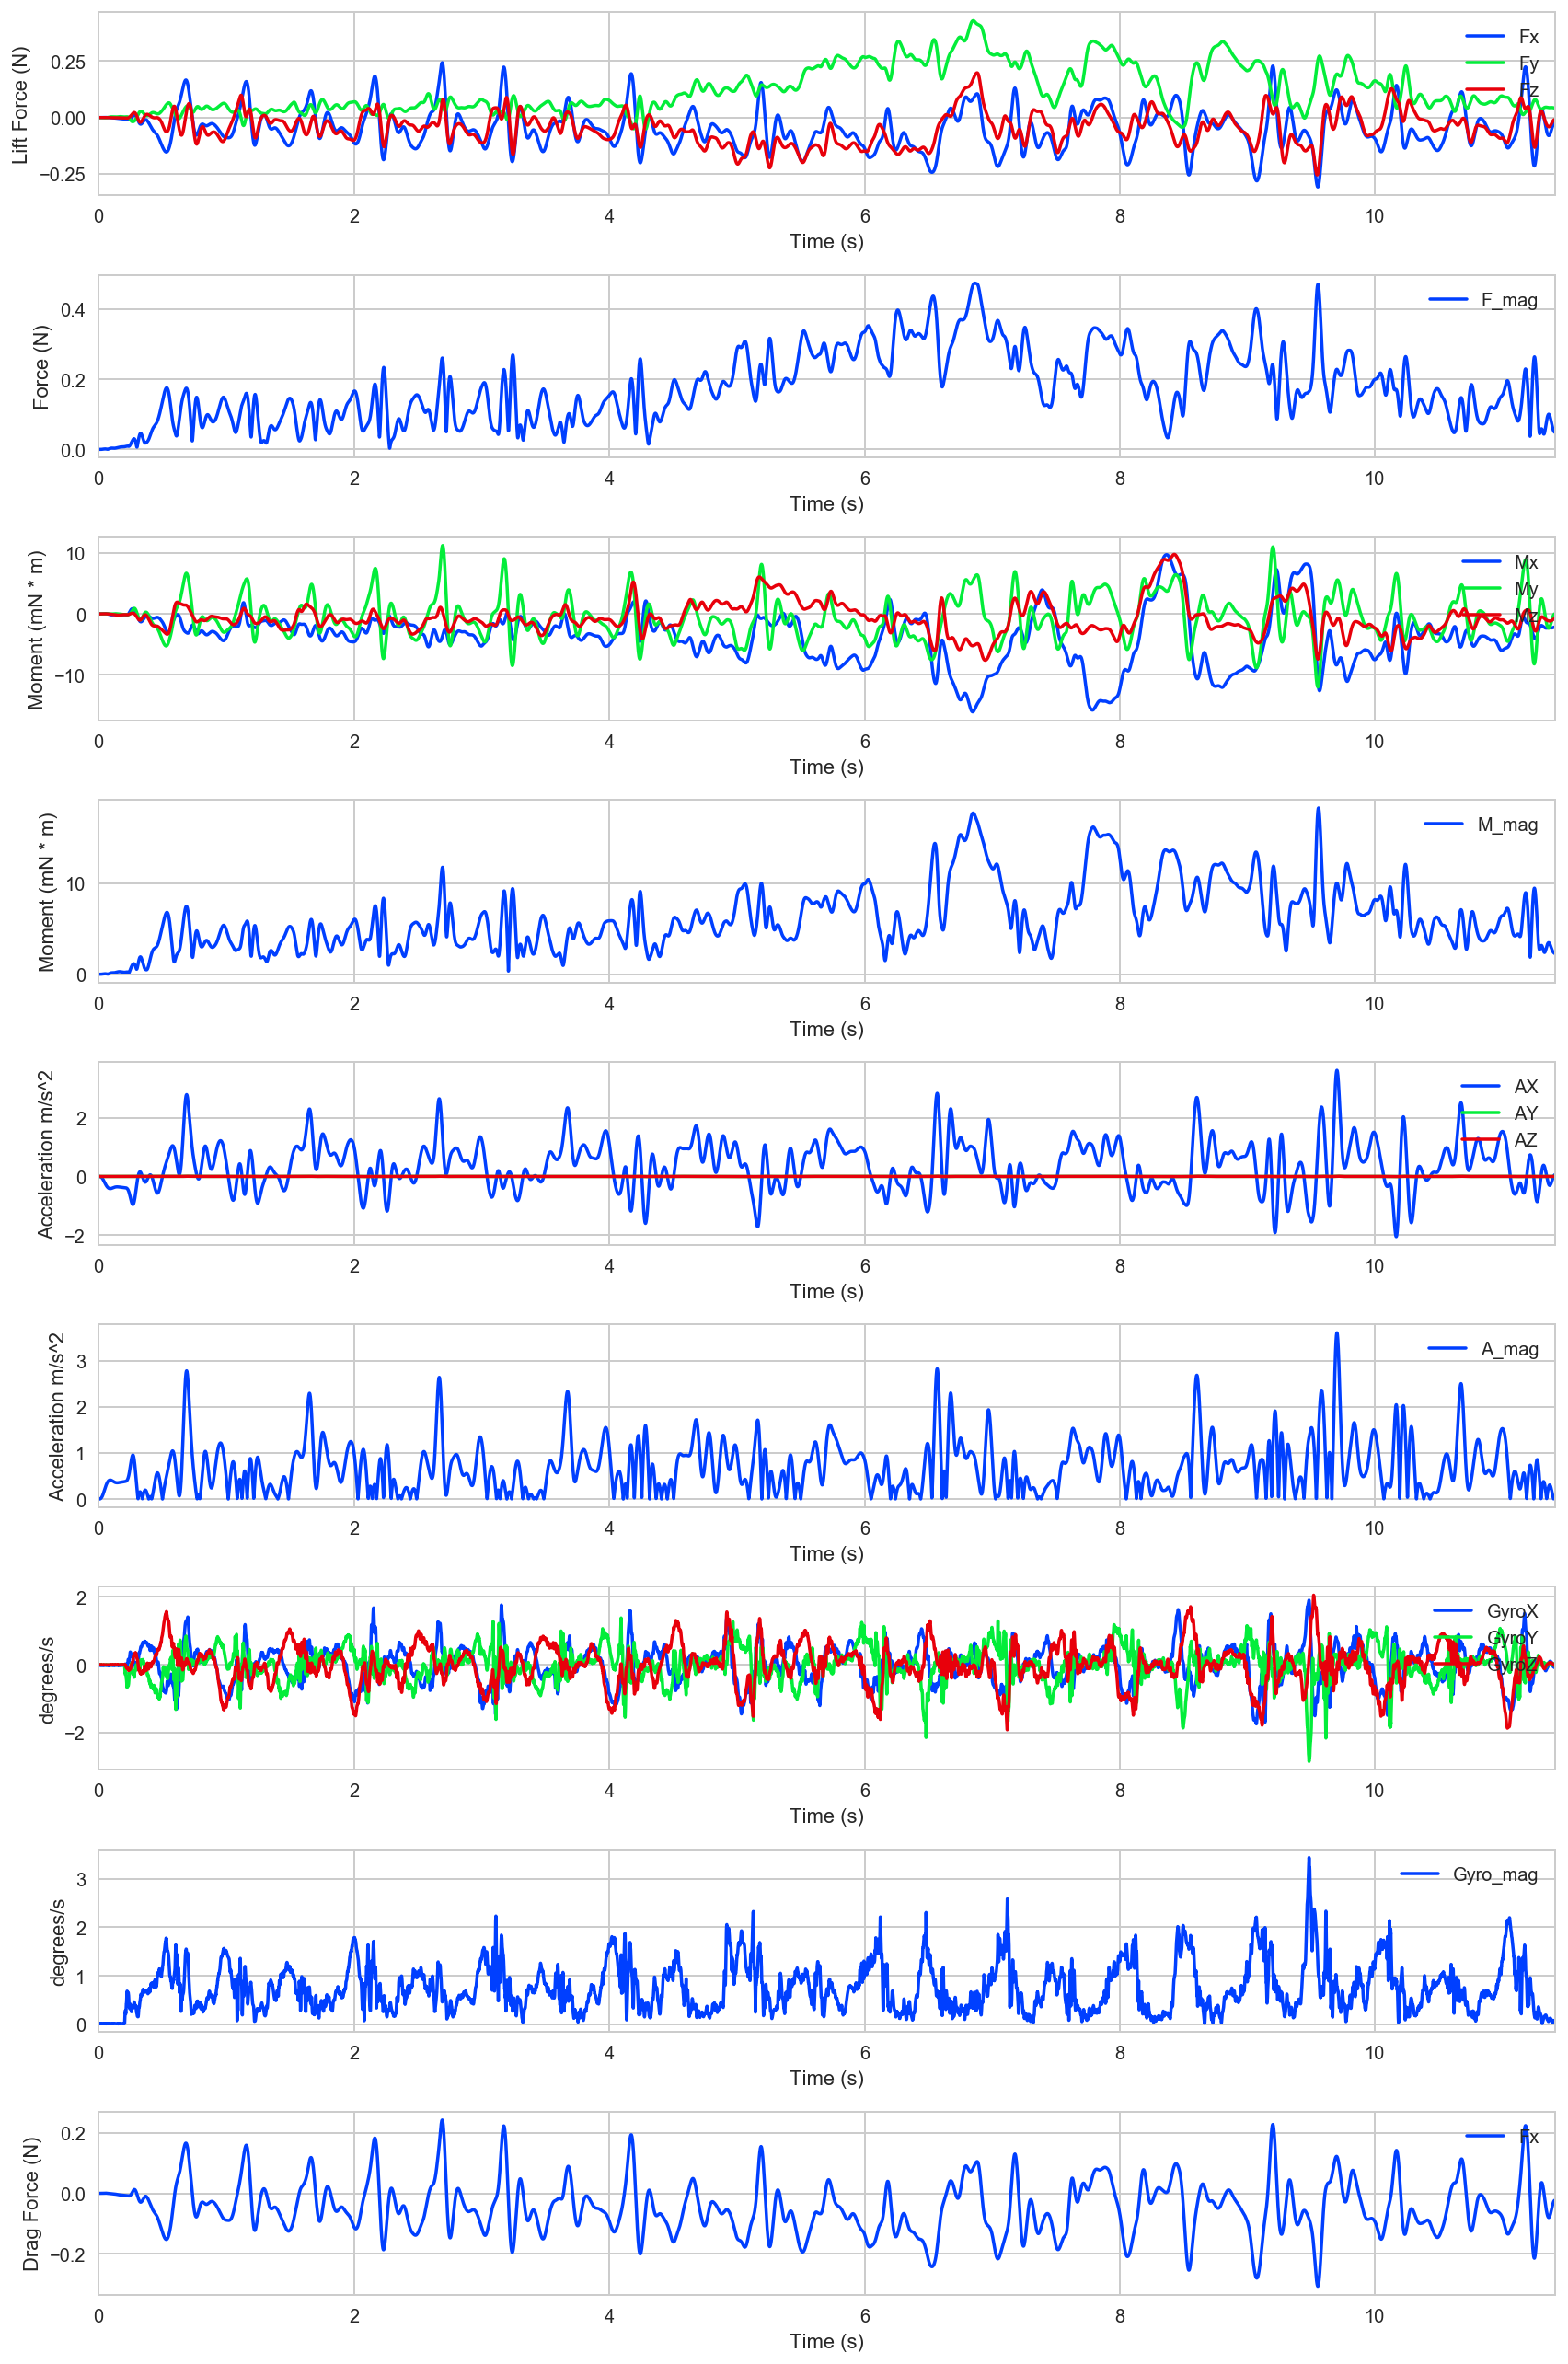

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag', 'Fx'], display=True, save_figure=False)

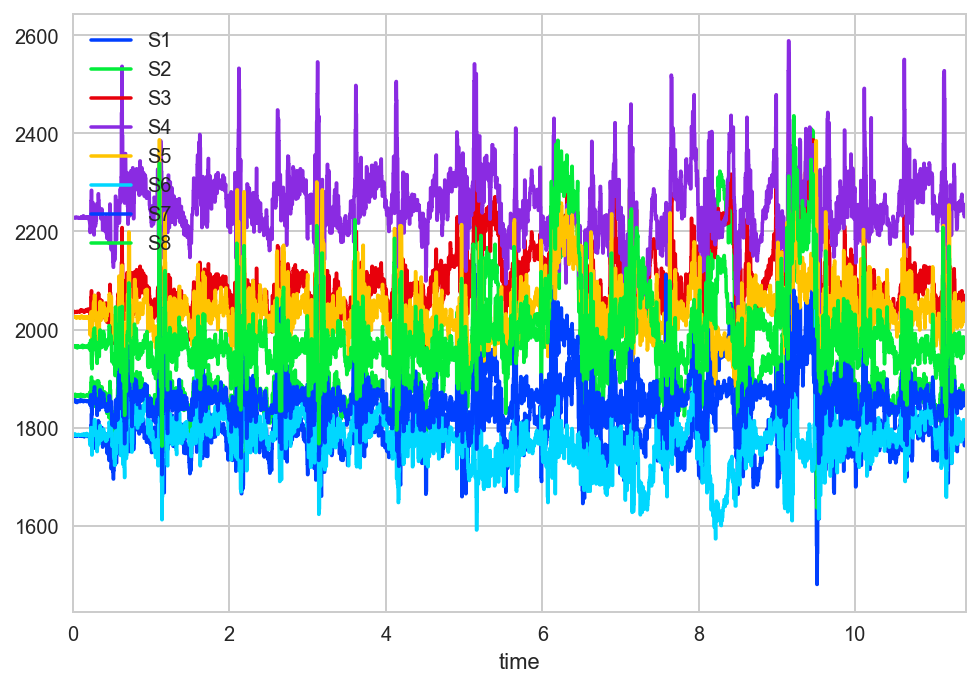

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=7040,end_time=10900)
print drag

drag energy (mJ): -11.512361768
-11.512361768


In [8]:
electrical_energy_cont = utils.calculate_electrical_energy_cont(df, start_time=7040,end_time=10900)
electrical_energy = utils.calculate_electrical_energy(df, start_time=7040, end_time=10900)

electrical energy cont: 7.61526245477
electrical energy (Joules): 7.61219388005


In [9]:
import numpy as np
start = df['Right Leg Pos'][7500:8500].argmax()
end = df['Right Leg Pos'][11000:11500].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

7966 11180
6.27973424734
1.81776779382
[[ 7966  8966]
 [ 8966  9966]
 [ 9966 10966]
 [10966 11966]]


In [10]:
drags = utils.get_drag_energy_from_list(df, False, intervals)

drag energy (mJ): -2.36981301033
drag energy (mJ): -3.24477008629
drag energy (mJ): -3.31029982416
drag energy (mJ): -2.33519701042
